In [18]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [50]:
dat = data.frame(
    Loc = c(1, 2, 3, 4, 5, 7),
    Val = c(2, 2, 4, 9, 3, 1))
dat

Loc,Val
<dbl>,<dbl>
1,2
2,2
3,4
4,9
5,3
7,1


In [51]:
start  = 1
end    = 10
breaks = seq(start, end, 2)
breaks

[1] 1 3 5 7 9

In [60]:
tmp = dat
tmp$group = cut(tmp$Loc, breaks=breaks, right = FALSE)
tmp = tmp %>% group_by(group) %>% summarize(Val = sum(Val))
tmp = tmp %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right"))
tmp

Left,Right,Val
<chr>,<chr>,<dbl>
1,3,4
3,5,13
5,7,3
7,9,1


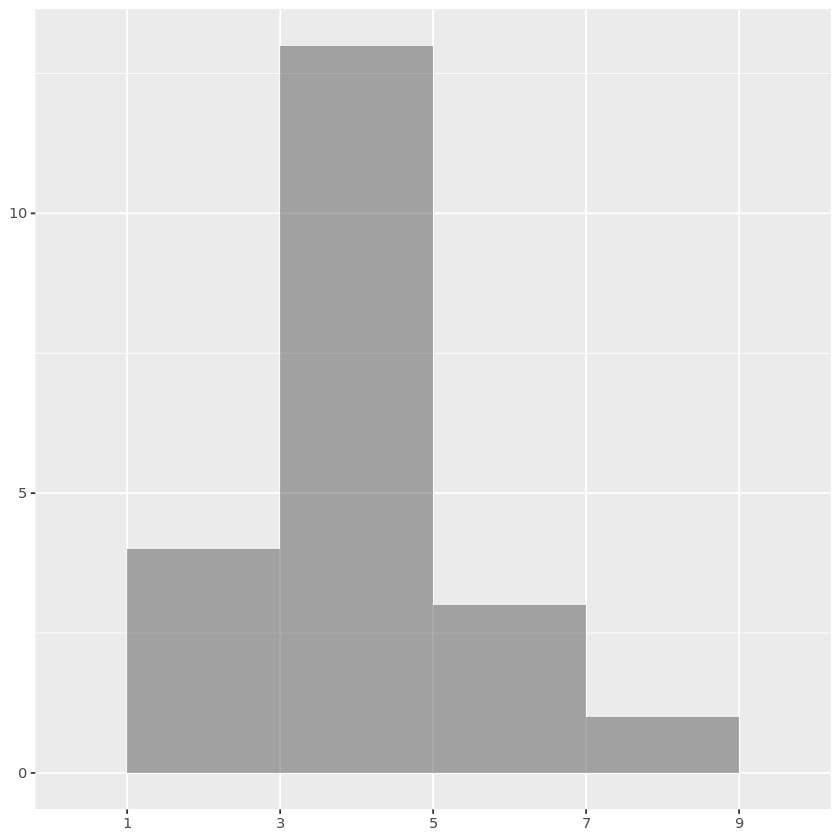

In [62]:
ggplot(tmp) + geom_rect(mapping=aes(xmin=Left, xmax=Right, ymin=0, ymax=Val), alpha=0.5)